In [1]:
archive = pd.DataFrame.from_csv('./data/archive501.csv')
stats = pd.DataFrame.from_csv('./data/statistics501.csv')

In [2]:
stats.columns

Index([u'ArchiveSize', u'DE', u'ElapsedTime', u'Improvements', u'NFE', u'PCX',
       u'PopulationSize', u'Restarts', u'SBX', u'SPX', u'UM', u'UNDX'],
      dtype='object')

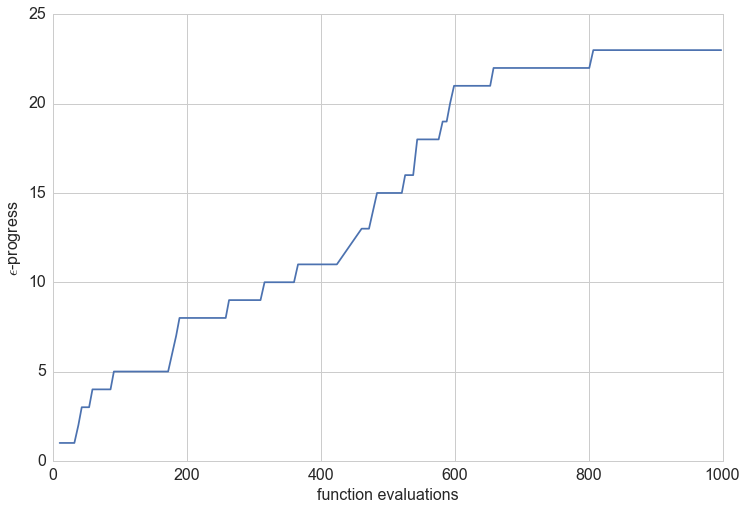

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(stats.NFE, stats['Improvements'])
ax.set_ylabel('$\epsilon$-progress')
ax.set_xlabel('function evaluations')

change_fontsize(fig, 16)
# save_fig(fig, './figs/',9)

plt.show()

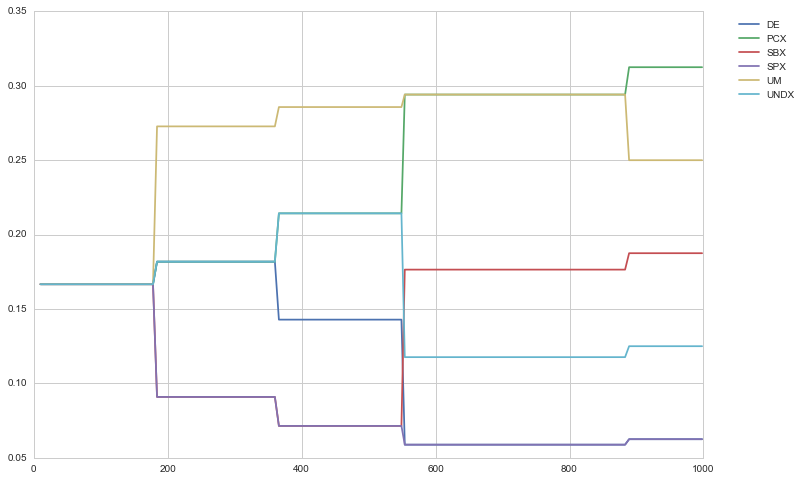

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

operators = ['DE', 'PCX', 'SBX','SPX','UM','UNDX']
for operator in operators:
    ax.plot(stats.NFE, stats[operator], label=operator)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [5]:
archive.columns

Index([u'var 0', u'var 1', u'var 2', u'var 3', u'var 4', u'obj 0', u'obj 1',
       u'obj 2', u'obj 3', u'obj 4', u'obj 5'],
      dtype='object')

In [6]:
variabels = ['var 0', 'var 1', 'var 2', 'var 3', 'var 4']
pathways = np.floor(archive[variabels])
pathways

,var 0,var 1,var 2,var 3,var 4
0,5,20,10,2,2
1,7,12,9,0,1
2,4,19,16,2,0
3,4,5,16,2,0
4,10,19,18,0,2
5,1,20,19,1,0
6,17,20,19,2,0
7,18,20,19,1,0
8,6,4,19,2,0
9,0,20,19,1,0


In [7]:
policies = ['RfR Small Scale', 
            'RfR Medium Scale', 
            'RfR Large Scale', 
            'RfR Side channel', 
            'Dike 1:500 +0.5m', 
            'Dike 1:500 extr.', 
            'Dike 1:1000', 
            'Dike 1:1000 extr.', 
            'Dike 2nd Q x 1.5', 
            'Dike Climate dikes', 
            'Dike Wave resistant', 
            'Coop Small', 
            'Coop Medium', 
            'Coop Large', 
            'DC Elevated', 
            'DC Dikes', 
            'DC Mounts', 
            'DC Floating',
            'Alarm Early',
            'no policy',
            'Alarm Education'
            ]
    
rules = ['SMALL', 'LARGE', 'XLARGE']

pathways['var 0'] = [policies[int(i)] for i in pathways['var 0']]
pathways['var 1'] = [policies[int(i)] for i in pathways['var 1']]
pathways['var 2'] = [policies[int(i)] for i in pathways['var 2']]

In [8]:
pathways

,var 0,var 1,var 2,var 3,var 4
0,Dike 1:500 extr.,Alarm Education,Dike Wave resistant,2,2
1,Dike 1:1000 extr.,Coop Medium,Dike Climate dikes,0,1
2,Dike 1:500 +0.5m,no policy,DC Mounts,2,0
3,Dike 1:500 +0.5m,Dike 1:500 extr.,DC Mounts,2,0
4,Dike Wave resistant,no policy,Alarm Early,0,2
5,RfR Medium Scale,Alarm Education,no policy,1,0
6,DC Floating,Alarm Education,no policy,2,0
7,Alarm Early,Alarm Education,no policy,1,0
8,Dike 1:1000,Dike 1:500 +0.5m,no policy,2,0
9,RfR Small Scale,Alarm Education,no policy,1,0


In [9]:
pathways.to_clipboard()

In [10]:
obj_scores = archive[[u'obj 0', u'obj 1',
             u'obj 2', u'obj 3', u'obj 4', u'obj 5']]

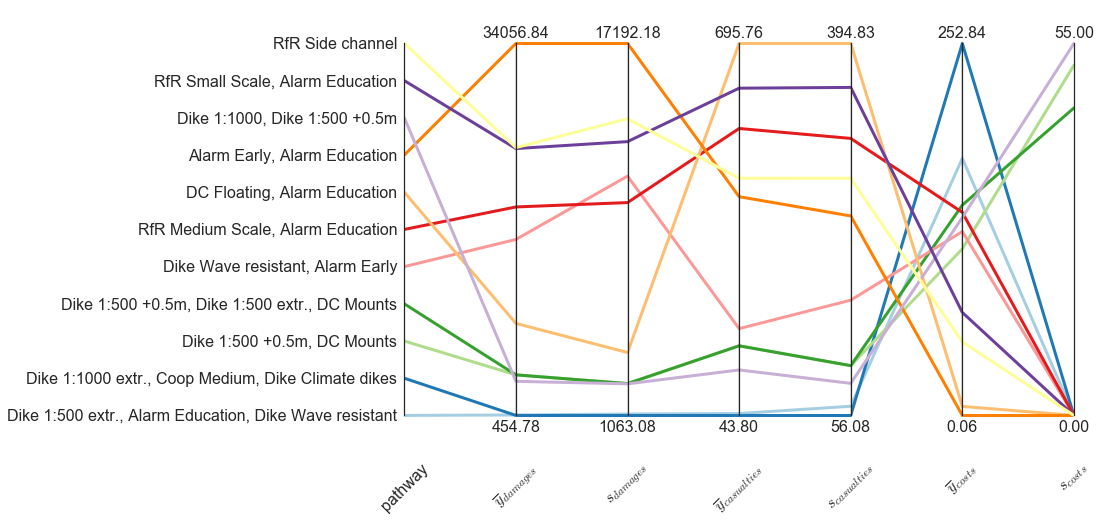

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  

sns.set_style('white')

archive = pd.DataFrame.from_csv('./data/archive501.csv')
obj_scores = archive[[u'obj 0', u'obj 1',
             u'obj 2', u'obj 3', u'obj 4', u'obj 5']]

normalization_data = np.array([34608.543, 17107.6871672,
                               756.9814067, 388.78367684,
                               1111.92459913, 52.2242060867])
obj_scores = obj_scores*normalization_data

variabels = ['var 0', 'var 1', 'var 2']
pathways = np.floor(archive[variabels])

policies = ['RfR Small Scale', 
            'RfR Medium Scale', 
            'RfR Large Scale', 
            'RfR Side channel', 
            'Dike 1:500 +0.5m', 
            'Dike 1:500 extr.', 
            'Dike 1:1000', 
            'Dike 1:1000 extr.', 
            'Dike 2nd Q x 1.5', 
            'Dike Climate dikes', 
            'Dike Wave resistant', 
            'Coop Small', 
            'Coop Medium', 
            'Coop Large', 
            'DC Elevated', 
            'DC Dikes', 
            'DC Mounts', 
            'DC Floating',
            'Alarm Early',
            'no policy',
            'Alarm Education'
            ]
    
rules = ['SMALL', 'LARGE', 'XLARGE']

pathways['var 0'] = [policies[int(i)] for i in pathways['var 0']]
pathways['var 1'] = [policies[int(i)] for i in pathways['var 1']]
pathways['var 2'] = [policies[int(i)] for i in pathways['var 2']]


def joiner(x):
    x = x.values
    x = [entry for entry in x if entry != 'no policy']
    return ', '.join(x)    
pathways = pathways.apply(joiner, axis=1)

obj_scores.loc[:, 'pathway'] = pathways


def make_parallel_plot(nr_columns, labels, maxima, minima):

    fig = plt.figure()
    axes = []
    
    # we need one axes less than the shape
    for i in range(1, nr_columns):
        ax = fig.add_subplot(1,nr_columns-1,i,  ylim=(-0.1,1.1))
        axes.append(ax)
        ax.set_xlim([i,i+1])
        ax.xaxis.set_major_locator(ticker.FixedLocator([i]))
        ax.xaxis.set_ticklabels([labels[i-1]], rotation=45)
        ax.xaxis.set_tick_params(bottom=False, top=False)
        
        #let's put our own tick labels
        if i>1:
            ax.yaxis.set_ticks([])
            ax.text(i, 1.01, "{:.2f}".format(maxima[i-1]), va="bottom", ha="center", 
                    fontsize=16)
            ax.text(i, -0.01,"{:.2f}".format(minima[i-1]), va="top", ha="center", 
                    fontsize=16)
        
        ax.spines['left'].set_bounds(0, 1)
        ax.spines['right'].set_bounds(0, 1)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    
    # for the last axis, we need 2 ticks (also for the right hand side
    ax.spines['right'].set_bounds(0, 1)
    ax.xaxis.set_major_locator(ticker.FixedLocator([i, i+1]))
    ax.xaxis.set_ticklabels(labels[i-1:i+1])
    ax.text(i+1, 1.01, "{:.2f}".format(maxima[i]), va="bottom", ha="center", 
            fontsize=16)
    ax.text(i+1, -0.01,"{:.2f}".format(minima[i]), va="top", ha="center", fontsize=16)
    
    # add the tick labels to the rightmost spine
    for tick in ax.yaxis.get_major_ticks():
        tick.label2On=True
    
    # stack the subplots together
    plt.subplots_adjust(wspace=0)
    
    return axes

obj_labels = ['pathway',
              '$\overline{y}_{damages}$', '$s_{damages}$',
              '$\overline{y}_{casualties}$', '$s_{casualties}$', 
              '$\overline{y}_{costs}$', '$s_{costs}$']

sns.set_palette("Paired", 11)
colors = sns.color_palette("Paired", 11)

minima = np.append(np.array([0,]),np.min(obj_scores.ix[:, 0:-1].values, axis=0))
maxima = np.append(np.array([11,]),np.max(obj_scores.ix[:, 0:-1].values, axis=0))

axes = make_parallel_plot(obj_scores.shape[1], obj_labels, maxima, minima)

cols = ['pathway', 'obj 0', 'obj 1', 'obj 2', 'obj 3', 'obj 4', 'obj 5', ]
data = obj_scores[cols]
data['pathway'] = np.arange(0,11)
data = data.values

def normalize(data):
        minima = np.min(data, axis=0)
        maxima = np.max(data, axis=0)
        d = maxima - minima
        
        d[d==0] = 1
        
        norm_data = data/d - minima/d
        return norm_data

data = normalize(data)

for i,j in zip(range(data.shape[1]-1),range(1,data.shape[1])):
    
        ax = axes[i]
        y = data[:, i:j+1]
        x = np.tile([i+1,j+1], (data.shape[0], 1))
        ax.plot(x.T, y.T, lw=3)

axes[0].yaxis.set_ticks(data[:, 0])      
axes[0].yaxis.set_ticklabels(obj_scores['pathway'].values)
        
fig = plt.gcf()

change_fontsize(fig, 16)
save_fig(fig, './figs/', 9)
plt.show()




# analysis of timing

In [1]:
from ema_workbench.util import load_results, ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

experiments, outcomes = load_results('./data/pathways with timing.tar.gz')

[INFO] results loaded succesfully from ./data/pathways with timing.tar.gz


In [2]:
policy = experiments['policy']
timing = outcomes['Timing']

In [3]:
df = pd.DataFrame([policy, timing[:,0], timing[:,1], timing[:,2]], 
                  index=['policy', 'timing 0', 'timing 1', 'timing 2']).T

In [4]:
grouped = df.groupby('policy')

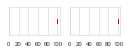

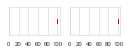

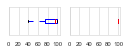

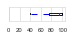

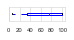

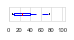

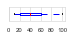

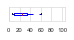

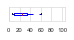

In [5]:
sns.set(style='whitegrid', rc={'lines.linewidth':0.5, 'grid.linewidth':0.5,
                              'axes.linewidth':0.5, 'xtick.labelsize':6})

group_names = [0, 1, 3]

for name in group_names:
    group = grouped.get_group(name)
    
    fig = plt.figure(figsize=(2,0.5))
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.boxplot(group['timing 1'].values, vert=False)
    ax2.boxplot(group['timing 2'].values, vert=False)
    
    for ax in [ax1, ax2]:
        ax.set_xlim(xmin=0, xmax=105)
        ax.set_yticks([])

    plt.savefig('./figs/timing pathway {}.png'.format(int(name)), 
                bbox_inches='tight', dpi=300)
    

group_names = [2,4,5,6,7,9]

for name in group_names:
    group = grouped.get_group(name)
    
    fig = plt.figure(figsize=(1,.25))
    
    ax = fig.add_subplot(111)
    ax.boxplot(group['timing 1'].values, vert=False)

    ax.set_xlim(xmin=0, xmax=105)
    ax.set_yticks([])
        

    plt.savefig('./figs/timing pathway {}.png'.format(int(name)), 
                bbox_inches='tight', dpi=300)

In [6]:
ema_logging.log_to_stderr(ema_logging.INFO)

experiments, outcomes = load_results('./data/pathways with timing.tar.gz')

[INFO] results loaded succesfully from ./data/pathways with timing.tar.gz


In [7]:
policy = experiments['policy']
climate = experiments['climate scenarios']
land_use = experiments['land use scenarios']
timing = outcomes['Timing']


df = pd.DataFrame([policy, climate, land_use, timing[:,0], timing[:,1], timing[:,2]], 
                  index=['policy', 'climate', 'land use' ,  'timing 0', 'timing 1', 'timing 2']).T

In [8]:
for i, label in enumerate(('no change/G', 'no change/G', 'Wp')):
    for j in range(i*10+1,  i*10+11):
        df['climate'].replace(to_replace=j, value=label, inplace=True)

In [9]:
urbanization = ['sustainableGrowth', 'urbanizationLargeSteady', 
                'urbanizationLargeAndFast', 'urbanizationDeurbanization']
deurbanization = ['Deurbanization', 'moreNature', 'NoChange']
                
for entry in urbanization:
    df['land use'].replace(to_replace=entry, value='urbanization', inplace=True)

for entry in deurbanization:
    df['land use'].replace(to_replace=entry, value='deurbanization', inplace=True)

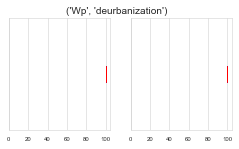

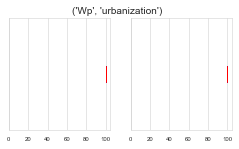

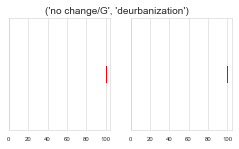

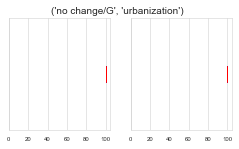

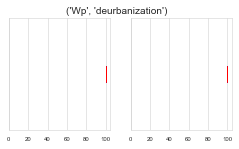

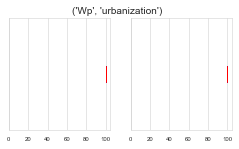

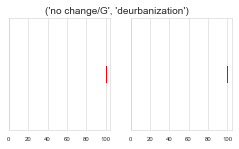

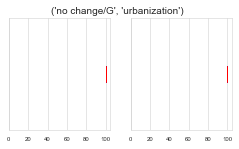

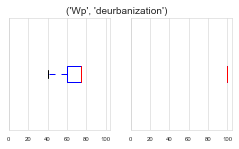

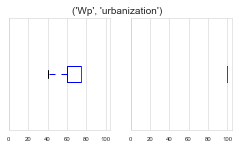

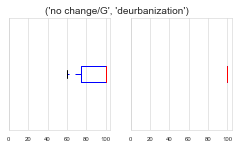

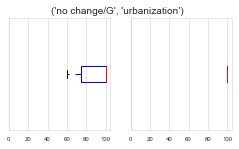

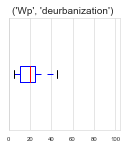

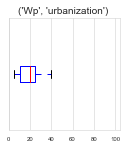

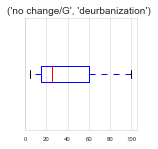

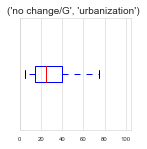

In [10]:
grouped = df.groupby('policy')

group_names = [0, 1, 3]

for name in group_names:
    group = grouped.get_group(name)
    
    for subgroup in group.groupby(['climate', 'land use']):
        label, subgroup = subgroup
    
        fig = plt.figure(figsize=(4,2))
        fig.suptitle(label)
        
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)

        ax1.boxplot(subgroup['timing 1'].values, vert=False)
        ax2.boxplot(subgroup['timing 2'].values, vert=False)

        for ax in [ax1, ax2]:
            ax.set_xlim(xmin=0, xmax=105)
            ax.set_yticks([])


group_names = [5]

for name in group_names:

    
    group = grouped.get_group(name)

    for subgroup in group.groupby(['climate', 'land use']):
        label, subgroup = subgroup
    
        fig = plt.figure(figsize=(2,2))
        fig.suptitle(label)

        ax = fig.add_subplot(111)
        ax.boxplot(subgroup['timing 1'].values, vert=False)

        ax.set_xlim(xmin=0, xmax=105)
        ax.set_yticks([])

            
plt.show()

In [68]:
# df.groupby(['policy', 'climate', 'land use']).count()
columns =[ u'timing 0', u'timing 1',u'timing 2']
df[columns] = df[columns].astype(int)

def percentile(group):
    percentiles = [25, 50, 75]
    
    timing_2 = group['timing 1']
    timing_3 = group['timing 2']
    
    a = pd.DataFrame({'timing 2': np.percentile(timing_2.values, percentiles),
                      'timing 3': np.percentile(timing_3.values, percentiles)},
                    index=percentiles)
    return a

tps = df.groupby(['policy', 'climate', 'land use']).apply(percentile)

In [71]:
tps = tps.unstack().unstack().unstack()

In [72]:
tps.to_clipboard()